## Загрузка данных

In [1]:
# Импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

In [2]:
# Пути к файлам
users_file = '/datasets/users_go.csv'
rides_file = '/datasets/rides_go.csv'
subscriptions_file = '/datasets/subscriptions_go.csv'

In [3]:
# Функции для загрузки и просмотра данных
def load_data(file_path):
    """
    Загружает данные из CSV-файла в DataFrame.
    
    :param file_path: путь к CSV-файлу
    :return: DataFrame с загруженными данными
    """
    return pd.read_csv(file_path)

def display_data(df, df_name, n=5):
    """
    Выводит первые строки DataFrame и общую информацию о нем.
    
    :param df: DataFrame для отображения
    :param df_name: Имя DataFrame для отображения в заголовке
    :param n: количество строк для отображения (по умолчанию 5)
    """
    print(f"{df_name} DataFrame")
    print("\nПервые строки DataFrame:")
    display(df.head(n))
    print("\nОбщая информация о DataFrame:\n")
    df.info()
    print("\n" + "="*50 + "\n")

In [4]:
# Загрузка данных
users_df = load_data(users_file)
rides_df = load_data(rides_file)
subscriptions_df = load_data(subscriptions_file)

In [5]:
# Отображение данных
display_data(users_df, "Users")
display_data(rides_df, "Rides")
display_data(subscriptions_df, "Subscriptions")

Users DataFrame

Первые строки DataFrame:


,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra



Общая информация о DataFrame:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


Rides DataFrame

Первые строки DataFrame:


,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28



Общая информация о DataFrame:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


Subscriptions DataFrame

Первые строки DataFrame:


,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199



Общая информация о DataFrame:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes




**Вывод:**

В данных отсутствуют пропущенные значения. Замена типа данных столбца "date" на "datetime" упростит операции с датами в дальнейшей работе.

## Предобработка данных

In [6]:
# Приведение столбца "date" к типу данных даты
rides_df['date'] = pd.to_datetime(rides_df['date'])

# Сделаем проверку
print("Тип столбца 'date' после преобразования:", rides_df['date'].dtype)

Тип столбца 'date' после преобразования: datetime64[ns]


In [7]:
# Создание нового столбца с номером месяца
rides_df['month'] = rides_df['date'].dt.month

# Вывод первых строк DataFrame для проверки
display(rides_df.head())

,user_id,distance,duration,date,month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8


In [8]:
# Определение минимальной и максимальной даты
min_date = pd.to_datetime(rides_df['date'].min())
max_date = pd.to_datetime(rides_df['date'].max())

# Подсчет количества месяцев за период доступных данных
months_count = (max_date.year - min_date.year) * 12 + max_date.month - min_date.month + 1

# Вывод периода данных и количества месяцев
print(f"Период данных: с {min_date.strftime('%Y-%m')} по {max_date.strftime('%Y-%m')}")
print(f"Количество месяцев: {months_count}")

Период данных: с 2021-01 по 2021-12
Количество месяцев: 12


In [9]:
def check_data(df_name, df):
    """
    Выводит количество явных дубликатов и пропусков в DataFrame.

    :param df_name: Название DataFrame для вывода
    :param df: DataFrame для проверки
    """
    print("=" * 50)
    print(f"Информация о DataFrame '{df_name}':")
    
    # Проверка наличия пропущенных значений в данных
    missing_values_count = df.isnull().sum().sum()
    print(f"Количество пропущенных значений: {missing_values_count}")
    
    # Проверка наличия дубликатов в данных
    duplicates_count = df.duplicated().sum()
    print(f"Количество явных дубликатов: {duplicates_count}")
    print("=" * 50)

# Пример использования функции для каждого DataFrame
check_data("Users", users_df)
check_data("Rides", rides_df)
check_data("Subscriptions", subscriptions_df)

Информация о DataFrame 'Users':
Количество пропущенных значений: 0
Количество явных дубликатов: 31
Информация о DataFrame 'Rides':
Количество пропущенных значений: 0
Количество явных дубликатов: 0
Информация о DataFrame 'Subscriptions':
Количество пропущенных значений: 0
Количество явных дубликатов: 0


In [10]:
# Удаление дубликатов из DataFrame с пользователями
users_df.drop_duplicates(inplace=True)

# Проверка
duplicates_count = users_df.duplicated().sum()
print(f"Количество дубликатов в DataFrame 'Users': {duplicates_count}")

Количество дубликатов в DataFrame 'Users': 0


**Вывод:**

1. Столбец 'date' был приведён к типу даты pandas.
2. В данных с поездками был создан новый столбец 'month', содержащий номер месяца для каждой поездки.
3. Данные доступны за 12 месяцев, с января 2021 года по декабрь 2021 года.
4. Пропущенные значения в датафреймах отсутствуют.
5. В результате проверки данных о пользователях было выявлено 31 дублирующихся записей, которые успешно удалены. В остальных данных дубликатов не обнаружено.

## Исследовательский анализ данных

### Частота встречаемости городов

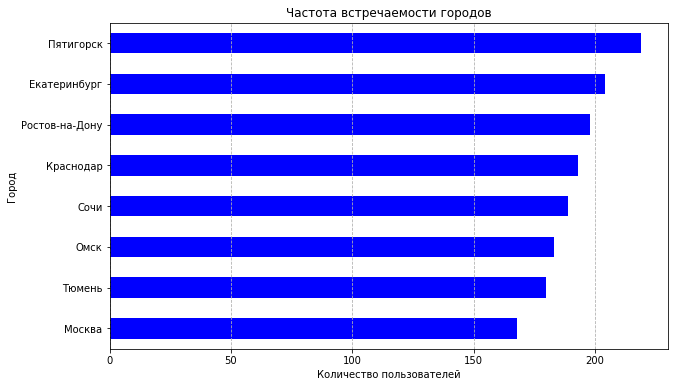

Общее количество пользователей сервиса: 1534
Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: city, dtype: int64


In [11]:
# Подсчет частоты встречаемости городов и сортировка по убыванию
city_counts = users_df['city'].value_counts()

# Визуализация частоты встречаемости городов
city_counts.sort_values().plot(kind='barh', color='blue', figsize=(10, 6), 
                               title='Частота встречаемости городов')
plt.xlabel('Количество пользователей')
plt.ylabel('Город')
plt.grid(axis='x', linestyle='--', alpha=1)
plt.show()

total_users = users_df.shape[0]

# Общее количество пользователей во всех городах
print(f'Общее количество пользователей сервиса: {total_users}')

# Вывод количества пользователей в каждом городе
print(city_counts)

Всего сервисом GoFast пользуются 1534 человека в 8 городах, особой популярностью сервис пользуется в городе Пятигорск - 219 пользователей.

Меньшая популярность в Москве - 168 пользователей. Стоит отметить, что во всех городах примерно одинаковое количество пользователей.

### Cоотношение пользователей с подпиской и без подписки

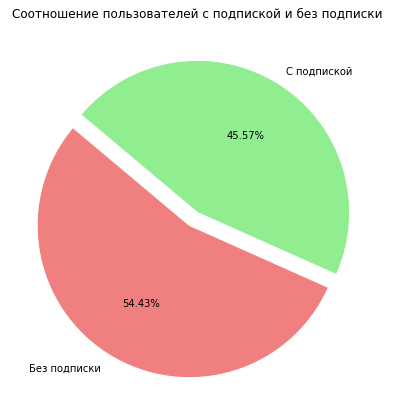

Пользователей с подпиской: 699 (45.57%), пользователей без подписки: 835 (54.43%)


In [12]:
# Подсчет количества пользователей с подпиской и без подписки
subscription_counts = users_df['subscription_type'].value_counts()

# Визуализация соотношения пользователей с подпиской и без подписки
plt.figure(figsize=(7, 7))
subscription_counts.plot(
    kind='pie',
    labels=['Без подписки', 'С подпиской'],
    autopct='%1.2f%%',
    wedgeprops={'linewidth': 1, 'edgecolor': 'white'},
    colors=['lightcoral', 'lightgreen'],
    startangle=140,
    explode=[0.1, 0]  # Сдвиг части "Без подписки" для выделения
)
plt.title('Соотношение пользователей с подпиской и без подписки')
plt.ylabel('')
plt.show()

# Получение значений
users_with_ultra = subscription_counts['ultra']
users_with_free = subscription_counts['free']

# Вывод количества пользователей с подпиской и без подписки
print(f'Пользователей с подпиской: {users_with_ultra} ({users_with_ultra / total_users * 100:.2f}%), пользователей без подписки: {users_with_free} ({users_with_free / total_users * 100:.2f}%)')

Общее количество пользователей составляет 1534. Из них 699 пользователей (45.57%) имеют подписку, в то время как 835 пользователей (54.43%) не имеют подписки. Таким образом, пользователи с подпиской составляют менее половины общего числа пользователей.

### Возраст пользователей

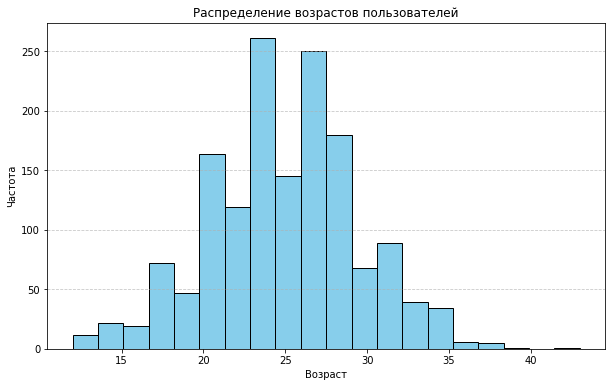

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

In [13]:
# Гистограмма распределения возрастов
plt.figure(figsize=(10, 6))
plt.hist(users_df['age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Распределение возрастов пользователей')
plt.xlabel('Возраст')
plt.ylabel('Частота')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Описательная статистика для возраста пользователей
users_df['age'].describe().T

Средний возраст пользователей составляет приблизительно 25 лет, со стандартным отклонением около 4.5 лет. Минимальный возраст составляет 12 лет, а максимальный - 43 года. Половина пользователей (50%) находится в возрасте до 25 лет, что указывает на молодую аудиторию. Третий квартиль (75%) составляет 28 лет, что означает, что 75% пользователей моложе 28 лет.

### Расстояние, которое пользователь преодолел за одну поездку

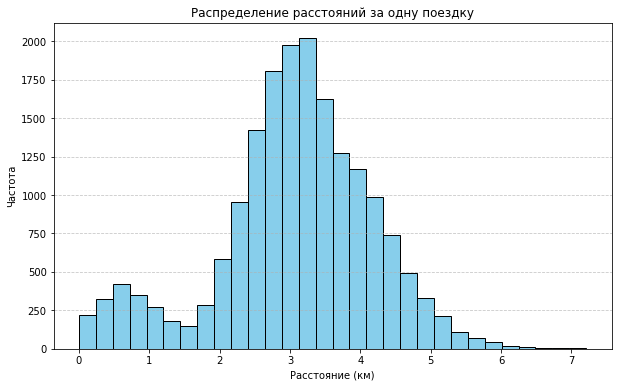

count    18068.000000
mean         3.070660
std          1.116831
min          0.000856
25%          2.543226
50%          3.133610
75%          3.776223
max          7.211008
Name: distance_km, dtype: float64

In [14]:
# Преобразование расстояния из метров в километры для удобства анализа
rides_df['distance_km'] = rides_df['distance'] / 1000

# Гистограмма распределения расстояний за одну поездку
plt.figure(figsize=(10, 6))
plt.hist(rides_df['distance_km'], bins=30, color='skyblue', edgecolor='black')
plt.title('Распределение расстояний за одну поездку')
plt.xlabel('Расстояние (км)')
plt.ylabel('Частота')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Описательная статистика для расстояния за одну поездку
rides_df['distance_km'].describe().T

Среднее расстояние за одну поездку составляет примерно 3.07 километра, что указывает на типичное расстояние, преодолеваемое пользователями. Стандартное отклонение составляет около 1.12 километра, что говорит о некоторой вариативности в данных.

Минимальное расстояние за одну поездку составляет всего 0.86 метра, что может указывать на аномалии в данных. Максимальное расстояние достигает 7.2 километра, что свидетельствует о том, что некоторые пользователи совершают довольно длинные поездки.

### Продолжительность поездок

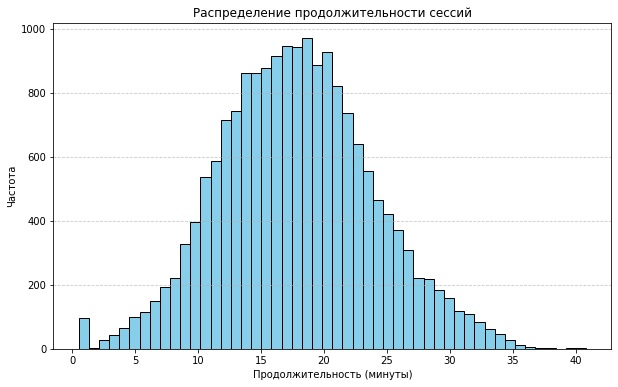

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64

In [15]:
# Гистограмма распределения продолжительности поездок
plt.figure(figsize=(10, 6))
plt.hist(rides_df['duration'], bins=50, color='skyblue', edgecolor='black')
plt.title('Распределение продолжительности сессий')
plt.xlabel('Продолжительность (минуты)')
plt.ylabel('Частота')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Описательная статистика для продолжительности поездок
rides_df['duration'].describe().T

Минимальная продолжительность одной поездки составляет всего 30 секунд, что может указывать на очень короткие поездки или возможные аномалии в данных. Максимальная продолжительность достигает 40.82 минут, что свидетельствует о том, что некоторые пользователи совершают довольно длинные поездки.

Медиана, составляющая 17.68 минут, указывает на то, что половина всех поездок составляет менее 17.68 минут.

### Анализ коротких поездок (обработка аномалий)

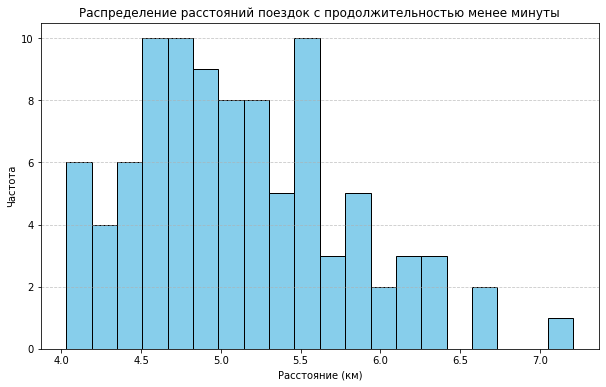

Процент аномально быстрых поездок от общего числа: 0.53%


In [16]:
# Фильтрация поездок с продолжительностью менее минуты
short_rides_df = rides_df[rides_df['duration'] < 1]

# Гистограмма распределения расстояний этих поездок
plt.figure(figsize=(10, 6))
plt.hist(short_rides_df['distance_km'], bins=20, color='skyblue', edgecolor='black')
plt.title('Распределение расстояний поездок с продолжительностью менее минуты')
plt.xlabel('Расстояние (км)')
plt.ylabel('Частота')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Описательная статистика для расстояний этих поездок
short_rides_df['distance_km'].describe().T

# Общее количество поездок
total_rides = len(rides_df)

# Количество аномально быстрых поездок (продолжительностью менее минуты)
fast_rides = len(short_rides_df)

# Расчет процента аномально быстрых поездок от общего числа
percentage_fast_rides = (fast_rides / total_rides) * 100

print("Процент аномально быстрых поездок от общего числа: {:.2f}%".format(percentage_fast_rides))

Из-за наличия большого количества поездок длительностью менее одной минуты было принято решение рассмотреть их отдельно.

В выборке содержится 95 записей. Среднее расстояние за такие поездки составляет приблизительно 5.11 километра, что указывает на довольно большие перемещения за очень короткое время. 

Минимальное расстояние за одну поездку составляет 4.03 километра, что уже является значительным расстоянием для поездки, длительностью менее минуты. Максимальное расстояние достигает 7.21 километра.

Процент быстрых поездок от общего числа - 0.53, в рамках проекта нет возможности уточнить причину ошибки в данных, поэтому в дальнейшем они будут удалены.

In [17]:
# Удаление аномально быстрых поездок (продолжительностью менее минуты) из исходного DataFrame
rides_df = rides_df[rides_df['duration'] >= 1]

# Выводим обновленное количество всех поездок после удаления аномально быстрых
print("Общее количество поездок после удаления аномально быстрых:", len(rides_df))

Общее количество поездок после удаления аномально быстрых: 17973


## Объединение данных

### Объединим данные о пользователях, поездках и подписках в один датафрейм. Для этого воспользуйтесь методом merge()

In [18]:
# Объединение данных о пользователях, поездках и подписках в один DataFrame
merged_data = rides_df.merge(users_df, on='user_id').merge(subscriptions_df, on='subscription_type')

display(merged_data.head())

,user_id,distance,duration,date,month,distance_km,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
0,1,4409.919140,25.599769,2021-01-01,1,4.409919,Кира,22,Тюмень,ultra,6,0,199
1,1,2617.592153,15.816871,2021-01-18,1,2.617592,Кира,22,Тюмень,ultra,6,0,199
2,1,754.159807,6.232113,2021-04-20,4,0.754160,Кира,22,Тюмень,ultra,6,0,199
3,1,2694.783254,18.511000,2021-08-11,8,2.694783,Кира,22,Тюмень,ultra,6,0,199
4,1,4028.687306,26.265803,2021-08-28,8,4.028687,Кира,22,Тюмень,ultra,6,0,199


In [19]:
# Сравнение количества строк до и после объединения
print("Количество строк в таблице rides_df до объединения:", len(rides_df))
print("Количество строк в таблице users_df до объединения:", len(users_df))
print("Количество строк в таблице subscriptions_df до объединения:", len(subscriptions_df))
print("Количество строк в объединенной таблице после объединения:", len(merged_data))

# Подсчет количества уникальных пользователей
unique_users = merged_data['user_id'].nunique()
print("Количество уникальных пользователей:", unique_users)

# Проверка наличия пропусков
missing_values = merged_data.isnull().sum().sum()
print("Количество пропусков в данных:", missing_values)

Количество строк в таблице rides_df до объединения: 17973
Количество строк в таблице users_df до объединения: 1534
Количество строк в таблице subscriptions_df до объединения: 2
Количество строк в объединенной таблице после объединения: 17973
Количество уникальных пользователей: 1534
Количество пропусков в данных: 0


Данные успешно объеденины в один датафрейм.

### Создадим ещё два датафрейма из датафрейма, созданного на этапе 4.1:
**c данными о пользователях без подписки**  
**с данными о пользователях с подпиской**  

In [20]:
# Фильтрация данных о пользователях с подпиской
with_subscription_df = merged_data[merged_data['subscription_type'] == 'ultra']

# Фильтрация данных о пользователях без подписки
without_subscription_df = merged_data[merged_data['subscription_type'] == 'free']

# Проверка количества строк в каждом датафрейме
print("Количество строк в датафрейме с подпиской:", len(with_subscription_df))
print("Количество строк в датафрейме без подписки:", len(without_subscription_df))

# Проверка количества уникальных пользователей в каждом датафрейме
unique_users_with_subscription = with_subscription_df['user_id'].nunique()
unique_users_without_subscription = without_subscription_df['user_id'].nunique()

print("Количество уникальных пользователей с подпиской:", unique_users_with_subscription)
print("Количество уникальных пользователей без подписки:", unique_users_without_subscription)

Количество строк в датафрейме с подпиской: 6500
Количество строк в датафрейме без подписки: 11473
Количество уникальных пользователей с подпиской: 699
Количество уникальных пользователей без подписки: 835


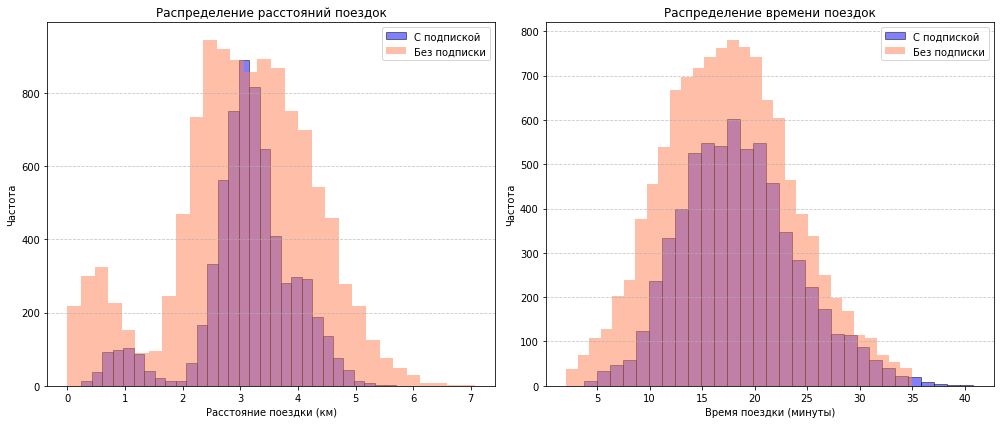

Описательная статистика для пользователей с подпиской:
       distance_km     duration
count  6500.000000  6500.000000
mean      3.115445    18.541985
std       0.836895     5.572048
min       0.244210     3.760353
25%       2.785444    14.524654
50%       3.148637    18.178153
75%       3.560574    21.884129
max       5.699770    40.823963

Описательная статистика для пользователей без подписки:
        distance_km      duration
count  11473.000000  11473.000000
mean       3.028374     17.530771
std        1.235541      6.162609
min        0.000856      2.035632
25%        2.360878     13.085688
50%        3.102083     17.383807
75%        3.883979     21.638038
max        7.066004     34.948498


In [21]:
# Настройка размера графика
plt.figure(figsize=(14, 6))

# Гистограмма расстояний поездок для пользователей с подпиской и без подписки
plt.subplot(1, 2, 1)
plt.hist(with_subscription_df['distance_km'], bins=30, alpha=0.5, label='С подпиской', color='blue', edgecolor='black')
plt.hist(without_subscription_df['distance_km'], bins=30, alpha=0.5, label='Без подписки', color='coral')
plt.xlabel('Расстояние поездки (км)')
plt.ylabel('Частота')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.title('Распределение расстояний поездок')
plt.legend()

# Гистограмма времени поездок для пользователей с подпиской и без подписки
plt.subplot(1, 2, 2)
plt.hist(with_subscription_df['duration'], bins=30, alpha=0.5, label='С подпиской', color='blue', edgecolor='black')
plt.hist(without_subscription_df['duration'], bins=30, alpha=0.5, label='Без подписки', color='coral')
plt.xlabel('Время поездки (минуты)')
plt.ylabel('Частота')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.title('Распределение времени поездок')
plt.legend()

# Настройка плотного размещения графиков
plt.tight_layout()
plt.show()

# Вывод описательной статистики для пользователей с подпиской
print("Описательная статистика для пользователей с подпиской:")
print(with_subscription_df[['distance_km', 'duration']].describe())

# Вывод описательной статистики для пользователей без подписки
print("\nОписательная статистика для пользователей без подписки:")
print(without_subscription_df[['distance_km', 'duration']].describe())

**Вывод:**

**Распределение расстояний поездок:**

- Оба типа пользователей имеют схожее распределение расстояний поездок, с пиком в районе 3 км.
- Среднее расстояние поездок у пользователей с подпиской чуть выше (3.115 км) по сравнению с пользователями без подписки (3.028 км).
- Пользователи без подписки совершают более короткие поездки (мин. 0.0008 км) и несколько длиннее поездки (макс. 7.07 км), чем пользователи с подпиской (мин. 0.24 км, макс. 5.70 км).

**Распределение времени поездок:**

- Средняя продолжительность поездок у пользователей с подпиской (18.54 минут) немного выше, чем у пользователей без подписки (17.53 минут).
- Пользователи без подписки совершают поездки с большей разбросанностью по продолжительности, что видно по более высокому стандартному отклонению (6.16 минут против 5.57 минут у пользователей с подпиской).
-Максимальная продолжительность поездки у пользователей с подпиской выше (40.82 минут против 34.95 минут у пользователей без подписки).

## Подсчёт выручки

### Создадим датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными из шага 4: найдём суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.

In [22]:
# Округляем время поездки вверх до целого числа минут
merged_data['duration'] = np.ceil(merged_data['duration'])

# Создаем датафрейм с агрегированными данными
aggregated_data = merged_data.groupby(['user_id', 'month']).agg({
    'distance': 'sum',         # Суммарное расстояние
    'duration': 'sum',            # Суммарное время поездок
    'user_id': 'count',           # Количество поездок
    'minute_price': 'first',      # Цена за минуту
    'start_ride_price': 'first',  # Цена за старт поездки
    'subscription_fee': 'first',  # Абонентская плата
    'subscription_type': 'first'  # Тип подписки
}).rename(columns={'user_id': 'ride_count'}).reset_index()

# Вывод первых строк для проверки
display(aggregated_data.head())

,user_id,month,distance,duration,ride_count,minute_price,start_ride_price,subscription_fee,subscription_type
0,1,1,7027.511294,42.0,2,6,0,199,ultra
1,1,4,754.159807,7.0,1,6,0,199,ultra
2,1,8,6723.470560,46.0,2,6,0,199,ultra
3,1,10,5809.911100,32.0,2,6,0,199,ultra
4,1,11,7003.499363,56.0,3,6,0,199,ultra


### В этот же датафрейм добавим столбец с помесячной выручкой, которую принёс каждый пользователь

In [23]:
# Добавим столбец с помесячной выручкой
aggregated_data['revenue'] = (
    aggregated_data['ride_count'] * aggregated_data['start_ride_price'] + 
    aggregated_data['duration'] * aggregated_data['minute_price'] + 
    aggregated_data['subscription_fee']
)

# Вывод первых строк для проверки
display(aggregated_data.head())

,user_id,month,distance,duration,ride_count,minute_price,start_ride_price,subscription_fee,subscription_type,revenue
0,1,1,7027.511294,42.0,2,6,0,199,ultra,451.0
1,1,4,754.159807,7.0,1,6,0,199,ultra,241.0
2,1,8,6723.470560,46.0,2,6,0,199,ultra,475.0
3,1,10,5809.911100,32.0,2,6,0,199,ultra,391.0
4,1,11,7003.499363,56.0,3,6,0,199,ultra,535.0


**Вывод:**

На этапе 5 мы произвели следующие действия:

1. Агрегирование данных: Мы создали новый датафрейм aggregated_data, который содержит суммарное расстояние, суммарное время поездок, количество поездок, цену за минуту, цену за старт поездки, абонентскую плату и тип подписки каждого пользователя.

2. Расчет помесячной выручки: Мы добавили столбец revenue, в котором рассчитывается помесячная выручка для каждого пользователя на основе условий оплаты:
    - Для пользователей с подпиской "Ultra" выручка включает абонентскую плату и стоимость поездок.
    - Для пользователей без подписки выручка включает стоимость стартов поездок и стоимость времени поездок.

## Проверка гипотез

### Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверьте гипотезу. Используйте исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки.

Нулевая гипотеза (H₀): Средние продолжительности поездок для пользователей с подпиской и без подписки равны.

Альтернативная гипотеза (H₁): Средняя продолжительность поездок для пользователей с подпиской больше, чем для пользователей без подписки.

In [24]:
# Разделим данные на две группы: с подпиской и без подписки
duration_without_subscription = without_subscription_df['duration']
duration_with_subscription = with_subscription_df['duration']

# Проведем t-тест
results = st.ttest_ind(duration_with_subscription, duration_without_subscription, equal_var=False, alternative='greater')

# Определим уровень значимости
alpha = 0.05

# Посмотрим на результаты
print("p-значение:", results.pvalue)

# Проверим, статистически значимы ли различия
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу: существует статистически значимая разница в продолжительности поездок между пользователями с подпиской и без нее. Пользователи с подпиской тратят больше времени на поездки.")
else:
    print("Не получилось отвергнуть нулевую гипотезу: нет статистически значимой разницы в продолжительности поездок между пользователями с подпиской и без нее.")

p-значение: 1.6162210195311063e-29
Отвергаем нулевую гипотезу: существует статистически значимая разница в продолжительности поездок между пользователями с подпиской и без нее. Пользователи с подпиской тратят больше времени на поездки.


### Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? Проверим гипотезу и сделаем выводы.

Нулевая гипотеза (H₀): Среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, равно 3130 метров.

Альтернативная гипотеза (H₁): Среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, превышает 3130 метров.

In [25]:
# Оптимальное расстояние одной поездки в метрах
optimal_distance = 3130

# Выборка расстояний поездок пользователей с подпиской
distance_with_subscription = with_subscription_df['distance']

# Проведем одновыборочный t-тест
results = st.ttest_1samp(distance_with_subscription, optimal_distance, alternative='greater')

# Определим уровень значимости
alpha = 0.05

# Посмотрим на результаты
print("p-значение:", results.pvalue)

# Проверим, статистически значимо ли среднее расстояние
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: среднее расстояние поездок пользователей с подпиской превышает оптимальное расстояние.')
else:
    print('Не получилось отвергнуть нулевую гипотезу: среднее расстояние поездок пользователей с подпиской не превышает оптимальное расстояние.') 

p-значение: 0.9195368847849785
Не получилось отвергнуть нулевую гипотезу: среднее расстояние поездок пользователей с подпиской не превышает оптимальное расстояние.


### Проверим гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки

Нулевая гипотеза (H₀): Помесячная выручка от пользователей с подпиской не отличается от выручки от пользователей без подписки.

Альтернативная гипотеза (H₁): Помесячная выручка от пользователей с подпиской выше, чем от пользователей без подписки.

In [26]:
# Выделение данных о помесячной выручке для пользователей с подпиской и без подписки
with_subscription_revenue = aggregated_data.query('subscription_type == "ultra"')['revenue']
without_subscription_revenue = aggregated_data.query('subscription_type == "free"')['revenue']

# Проведем t-тест для независимых выборок
results = st.ttest_ind(with_subscription_revenue, without_subscription_revenue, alternative='greater')

# Определим уровень значимости
alpha = 0.05

# Посмотрим на результаты
print("p-значение:", results.pvalue)

# Проверим, статистически значимо ли различие в выручке
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу: существует статистически значимое различие в помесячной выручке от пользователей с подпиской и без подписки.")
else:
    print("Не получилось отвергнуть нулевую гипотезу: нет статистически значимого различия в помесячной выручке от пользователей с подпиской и без подписки.")

p-значение: 2.0314113674863288e-30
Отвергаем нулевую гипотезу: существует статистически значимое различие в помесячной выручке от пользователей с подпиской и без подписки.


## Распределения

### Отделу маркетинга GoFast поставили задачу: нужно провести акцию с раздачей промокодов на один бесплатный месяц подписки, в рамках которой как минимум 100 существующих клиентов должны продлить эту подписку. То есть по завершении периода действия подписки пользователь может либо отказаться от неё, либо продлить, совершив соответствующий платёж. Эта акция уже проводилась ранее и по итогу выяснилось, что после бесплатного пробного периода подписку продлевают 10 % пользователей. Выясните, какое минимальное количество промокодов нужно разослать, чтобы вероятность не выполнить план была примерно 5 %. Подберите параметры распределения, описывающего эту ситуацию, постройте график распределения и сформулируйте ответ на вопрос о количестве промокодов

Минимальное количество промокодов: 1161


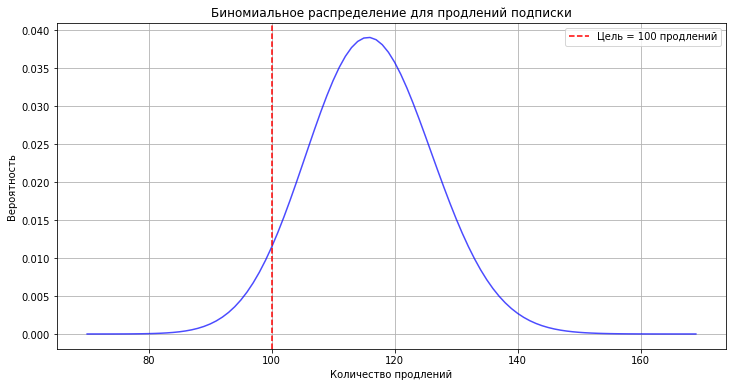

In [27]:
# Дано
p = 0.10  # вероятность продления подписки
target = 100  # целевое количество продлений
alpha = 0.05  # вероятность не выполнить план

# Функция для нахождения минимального n
def find_min_n(target, p, alpha):
    n = target  # начнем с количества равного целевому
    while True:
        # Вероятность иметь меньше чем 'target' продлений
        prob = st.binom.cdf(target-1, n, p)
        if prob <= alpha:
            return n
        n += 1

# Находим минимальное количество промокодов
min_promocodes = find_min_n(target, p, alpha)
print(f"Минимальное количество промокодов: {min_promocodes}")

# Построение графика распределения
n = min_promocodes
x = np.arange(70, 170)
pmf = st.binom.pmf(x, n, p)

plt.figure(figsize=(12, 6))
plt.plot(x, pmf, color='blue', alpha=0.7)
plt.axvline(target, color='red', linestyle='--', label=f'Цель = {target} продлений')
plt.title('Биномиальное распределение для продлений подписки')
plt.xlabel('Количество продлений')
plt.ylabel('Вероятность')
plt.legend()
plt.grid(True)
plt.show()

**Вывод:**

Для выполнения задачи отдела маркетинга GoFast, которая заключается в раздаче промокодов на один бесплатный месяц подписки, необходимо разослать как минимум 1161 промокодов, чтобы вероятность не выполнить план (100 продлений подписки) была примерно 5%.

### Отдел маркетинга рассылает клиентам push-уведомления в мобильном приложении. Клиенты могут открыть его или не открывать. Известно, что уведомления открывают около 40%получивших клиентов. Отдел планирует разослать 1 млн уведомлений. С помощью аппроксимации постройте примерный график распределения и оцените вероятность того, что уведомление откроют не более 399,5 тыс. пользователей.

Вероятность того, что уведомление откроют не более 399,5 тыс. пользователей: 0.1537


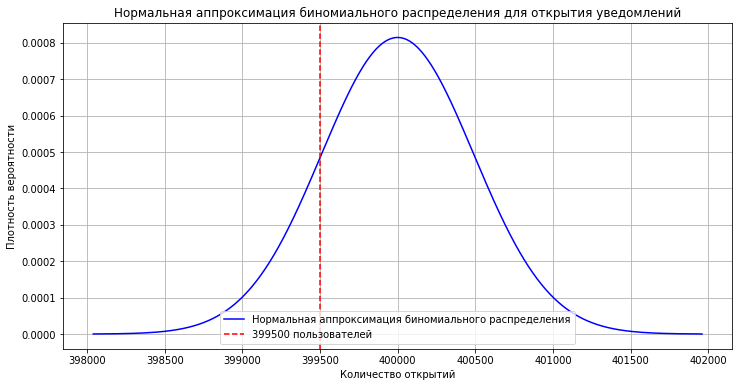

In [28]:
# Дано
n = 1000000  # количество уведомлений
p = 0.40  # вероятность открытия уведомления

# Параметры нормального распределения
mu = n * p  # среднее
sigma = np.sqrt(n * p * (1 - p))  # стандартное отклонение

# Значение, которое нужно оценить
x = 399500

# Вероятность того, что уведомление откроют не более 399,5 тыс. пользователей
probability = st.norm.cdf(x, mu, sigma)
print(f"Вероятность того, что уведомление откроют не более 399,5 тыс. пользователей: {probability:.4f}")

# Построение графика нормального распределения
x_values = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
y_values = st.norm.pdf(x_values, mu, sigma)

plt.figure(figsize=(12, 6))
plt.plot(x_values, y_values, color='blue', label='Нормальная аппроксимация биномиального распределения')
plt.axvline(x, color='red', linestyle='--', label=f'{x} пользователей')
plt.title('Нормальная аппроксимация биномиального распределения для открытия уведомлений')
plt.xlabel('Количество открытий')
plt.ylabel('Плотность вероятности')
plt.legend()
plt.grid(True)
plt.show()

**Вывод:**

Синяя линия представляет собой нормальное распределение, аппроксимирующее биномиальное распределение для данного случая.
Красная пунктирная линия обозначает значение 399,5 тыс. пользователей.
Площадь под кривой слева от красной линии (до 399,5 тыс.) соответствует вероятности 0.1537.
Таким образом, нормальная аппроксимация показывает, что вероятность того, что уведомление откроет не более 399,5 тыс. пользователей, составляет около 15.37%.

## Общий вывод

1. **На первом этапе анализа были загружены и изучены данные из трех CSV-файлов, содержащих информацию о пользователях, поездках и подписках.** 
   
   - При изучении данных было обнаружено, что в них отсутствуют пропущенные значения.  

2. **В процессе предобработки данных были выполнены следующие шаги:**

   - Преобразован столбец "date" в датафрейме с информацией о поездках в формат даты для более удобного анализа временных данных.
   - Добавлен новый столбец "month" в датафрейм с информацией о поездках, содержащий номер месяца, чтобы можно было анализировать данные на месячном уровне.
   - Данные охватывают 12 месяцев с января 2021 года по декабрь 2021 года.
   - Обнаружены и удалены 31 дубликат в датафрейме с информацией о пользователях для обеспечения точности анализа.

3. **Результаты исследовательского анализа данных позволяют получить глубокое понимание поведения пользователей и особенностей использования сервиса GoFast.**

   - Сервис активно используется в 8 городах, причем наибольшее число пользователей зарегистрировано в городе Пятигорск.
   - Лишь около половины пользователей предпочитают воспользоваться подпиской, что указывает на возможность улучшения предложения для привлечения новых пользователей.
   - Около половины пользователей моложе 25 лет, что важно учитывать при формировании маркетинговых кампаний.
   - Средняя продолжительность и расстояние поездок составляют примерно 18 минут и 3 километра соответственно.
   - Обнаружены и удалены аномалии, такие как короткие поездки с продолжительностью менее одной минуты, для обеспечения достоверности анализа.

4. **В процессе объединения данных был создан один датафрейм, что позволило провести детальный анализ поведения пользователей с подпиской и без неё.**

   - **Распределение расстояний поездок:** Оба типа пользователей совершают поездки преимущественно на расстояниях до 3 км. Среднее расстояние поездок у пользователей с подпиской немного выше (3.12 км) по сравнению с пользователями без подписки (3.03 км).
   - **Распределение времени поездок:** Средняя продолжительность поездок у пользователей с подпиской (18.54 минуты) немного выше, чем у пользователей без подписки (17.53 минуты). Пользователи без подписки имеют более высокое стандартное отклонение продолжительности поездок, что может свидетельствовать о большей вариативности в их поведении.
   - **Визуализация данных:** Показала, что обе группы пользователей предпочитают совершать короткие поездки, но пользователи с подпиской в среднем проезжают немного большее расстояние и тратят чуть больше времени на каждую поездку.

5. **Объединение данных.**

   - Создан датафрейм с агрегированными данными о поездках пользователей за каждый месяц, включающий суммарное расстояние, количество поездок и суммарное время для каждого пользователя.
   - Рассчитана помесячная выручка для подписчиков и неподписанных пользователей, используя информацию об условиях оплаты и округление продолжительности поездок до ближайшего целого числа.

6. **Проверка гипотез.**

   - **Гипотеза 1:** Тратят ли пользователи с подпиской больше времени на поездки?

     - **Нулевая гипотеза (H₀):** Средние продолжительности поездок для пользователей с подпиской и без подписки равны.
     - **Альтернативная гипотеза (H₁):** Средняя продолжительность поездок для пользователей с подпиской больше, чем для пользователей без подписки.
     - **Вывод:** Отвергаем нулевую гипотезу: пользователи с подпиской тратят больше времени на поездки.

   - **Гипотеза 2:** Превышает ли расстояние поездки пользователей с подпиской 3130 метров?

     - **Нулевая гипотеза (H₀):** Среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, равно 3130 метров.
     - **Альтернативная гипотеза (H₁):** Среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, превышает 3130 метров.
     - **Вывод:** Не получилось отвергнуть нулевую гипотезу: среднее расстояние поездок пользователей с подпиской не превышает оптимальное расстояние.

   - **Гипотеза 3:** Будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки?

     - **Нулевая гипотеза (H₀):** Помесячная выручка от пользователей с подпиской не отличается от выручки от пользователей без подписки.
     - **Альтернативная гипотеза (H₁):** Помесячная выручка от пользователей с подпиской выше, чем от пользователей без подписки.
     - **Вывод:** Отвергаем нулевую гипотезу: существует статистически значимое различие в помесячной выручке от пользователей с подпиской и без подписки.

7. **Маркетинговые прогнозы и расчёты.**

   - **Прогноз успеха акции с промокодами:**
     - Для достижения цели отдела маркетинга GoFast по продлению подписки 100 клиентами после бесплатного пробного месяца, необходимо разослать минимум 1161 промокод. Это количество обеспечивает вероятность около 95% выполнения плана, исходя из того, что 10% пользователей продлевают подписку после пробного периода.

   - **Прогноз отклика на push-уведомления:**
     - При планируемой рассылке 1 миллиона push-уведомлений, вероятность того, что уведомление откроют не более 399,5 тысяч пользователей, составляет около 15.37%. Этот прогноз был получен с помощью нормальной аппроксимации биномиального распределения, учитывая, что около 40% получателей открывают уведомления. График распределения подтверждает достаточно высокую вероятность 15.37% того, что уведомление откроет менее 399,5 тысяч пользователей.